# California Housing Price Prediction with Linear Regression
**Author:** Tommaso Lo Russo  
**Date:** March 2025  

This notebook presents an end-to-end analysis of the California Housing dataset using linear regression models, including data exploration, baseline modeling, model improvement with polynomial features, and cross-validation.

The project is structured into two main parts:

1. **Part 1: Exploratory Data Analysis and Baseline Linear Regression:**  
   In this section, we will explore the dataset, understand its characteristics, and build an initial linear regression pipeline to establish a performance baseline.

2. **Part 2: Model Improvement:**  
   Here, we will focus on optimizing the model, examining concepts such as polynomial feature transformation and cross-validation to enhance accuracy and generalization.

The primary goal is to develop a robust predictive model capable of accurately estimating median house values. It also analyzes the challenges and opportunities presented by the dataset.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [ ]:
ds = fetch_california_housing()

### Dataset Exploration and Feature Identification

To familiarize myself with the California Housing dataset, I examined its internal structure, which is a dictionary-like object provided by `sklearn.datasets`. I inspected its keys (`ds.keys()`) and the detailed description (`ds['DESCR']`). In particular, I reviewed the feature names (`ds['feature_names']`) and target names (`ds['target_names']`) to understand the available variables and their meanings.

* **Dataset Keys:** Contains keys such as 'data', 'target', 'feature_names', and 'DESCR'.
* **Dataset Description:** Provides context and units of measurement for each variable.
* **Feature Names:** Lists the column names used to construct the DataFrame.
* **Target Names:** Confirms that the target variable represents the median house value.


In [ ]:
print(ds.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
print(ds['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(ds['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [ ]:
print(ds['target_names'])

['MedHouseVal']


### Constructing the DataFrame and Target Series

With a clear understanding of the features and target, the next step is to organize the data into more manageable formats. This involves creating a Pandas DataFrame for the independent variables and a Pandas Series for the target variable.

I ensured that the DataFrame used meaningful column names derived directly from the `feature_names` attribute of the scikit-learn dataset to facilitate readability and manipulation.

After creating the DataFrame, I performed preliminary data quality checks to identify any missing values or duplicates, and examined the data types of each column to ensure correctness.


In [ ]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)
targets = pd.Series(ds.target)

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())
df.info()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### Analyzing Descriptive Statistics and Feature Scaling

To obtain a quantitative overview of the features, I used the `.describe()` method to calculate the descriptive statistics of the DataFrame. This analysis is fundamental for understanding the distribution, scale, and value range of each variable. I paid particular attention to identifying anomalies or discrepancies in scale among the different features.


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


From the `.describe()` output, it is clear that the features are not on the same scale.  
For example, `MedInc` ranges from about 0.5 to 15, while `Population` goes up to 35,000. `AveRooms` and `AveBedrms` also have very high maximum values (141 and 34), far beyond their 75th percentiles — which suggests the presence of outliers. `AveOccup` is another example: the median is around 2.8, but the maximum exceeds 1,200, again indicating a likely outlier.

### Visual Data Analysis

After examining the descriptive statistics, the next step is to visualize the data to uncover patterns, distributions, and anomalies that might not be apparent in numerical tables alone. This section focuses on the graphical representation of features and the target variable to gain deeper insights.

---


### Visualizing the Distribution of the Target Variable

To understand the distribution of the median house value (`MedHouseVal`), I generated a histogram and Kernel Density Estimate (KDE) plot using `seaborn.displot`. This visualization is crucial for identifying the distribution’s shape, the range of the most common values, and the presence of skewness or anomalies.


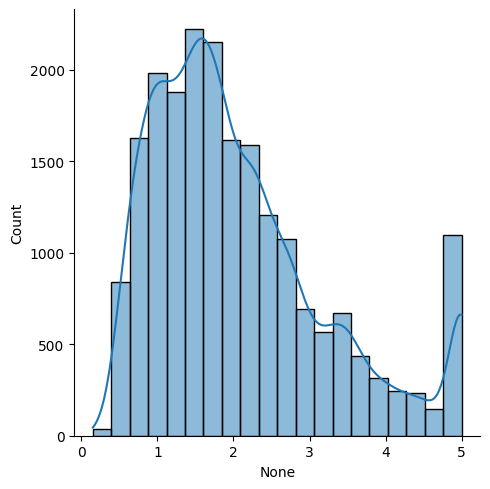

In [ ]:
sns.displot(x=targets, bins=20, kde=True)

In [ ]:
targets.describe()

,0
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [ ]:
targets.sort_values(ascending=False).head()

,0
5253,5.00001
5254,5.00001
5255,5.00001
5256,5.00001
5257,5.00001


The histogram and KDE plot of the target variable (`MedHouseVal`) indicate that the distribution is strongly right-skewed.  
Most values fall between 0.5 and 3.0 (approximately $100,000).

There is a pronounced spike at 5.00001, which is not random. Using `.sort_values()` confirms that many entries were clipped exactly at this value. This means that the distribution is missing data in the upper tail of the distribution. As a result, linear models might struggle to learn effectively given the incomplete information in this region.

---

### Visualizing Distributions of Independent Features

To analyze the distributions of all independent features, I created a multi-panel figure with subplots. I used Pandas' built-in `hist()` method, which efficiently generates histograms for all DataFrame columns. This provided quick insights into the shape and variability of each feature, helping to identify potential skewness, outliers, or multimodal distributions. I ensured an appropriate figure size (`figsize`) for better readability.


In [ ]:
def plot_feature_distributions(dataframe):
    dataframe.hist(bins=20, figsize=(12, 10))
    plt.tight_layout()
    plt.show()

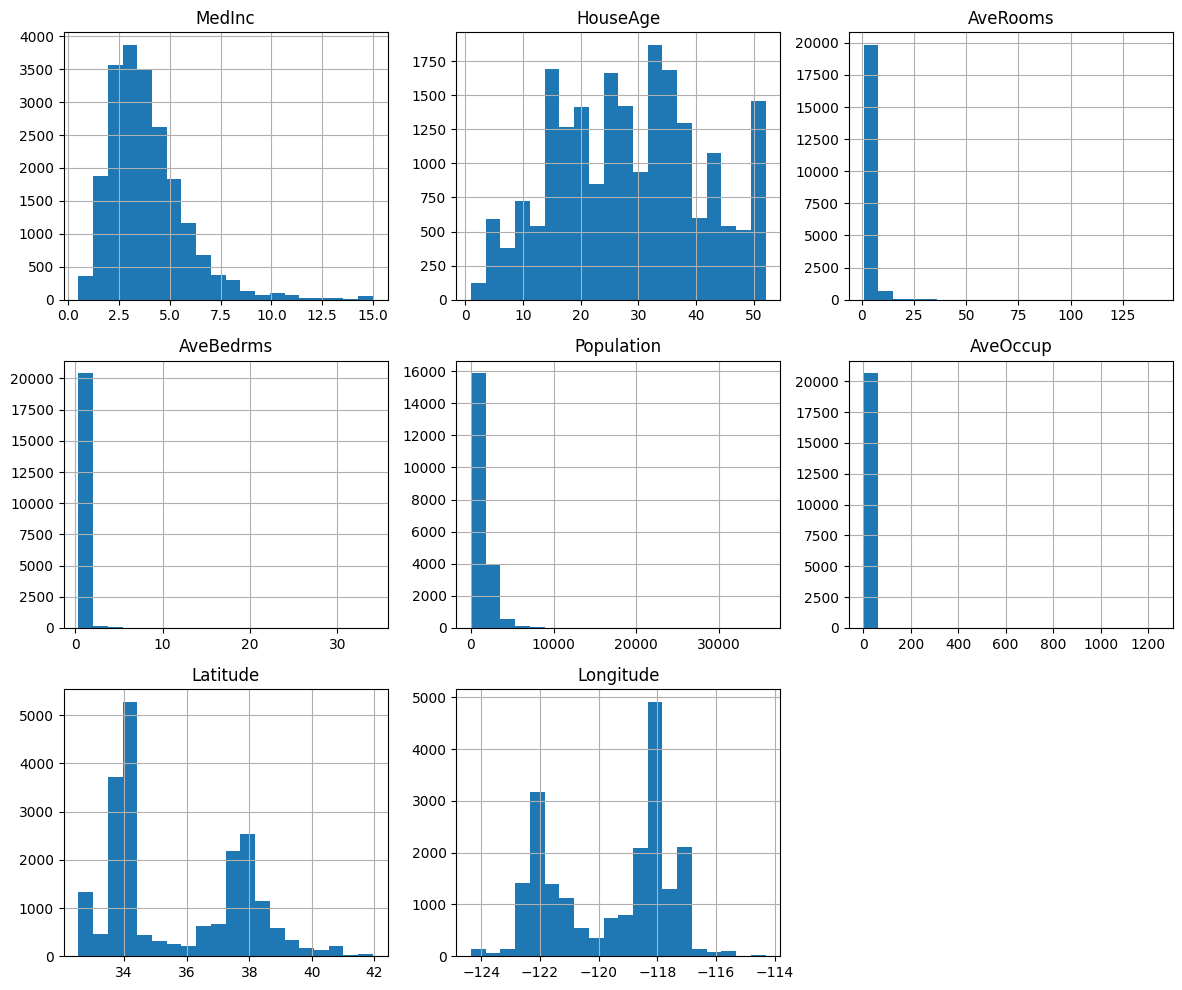

In [ ]:
plot_feature_distributions(df)

## Building and Evaluating the Baseline Linear Regression Model

With the data prepared and understood, the next step is to build and evaluate a predictive model. This section focuses on implementing a basic linear regression model while following machine learning best practices, including data splitting and performance evaluation.

### Splitting Data into Training and Test Sets

Before training any model, it is crucial to divide the dataset into a training set and a test set. This ensures that the model is evaluated on data it has not seen during training, providing a realistic estimate of its generalization capabilities. I used scikit-learn's `train_test_split` function, allocating 75% of the data for training and 25% for testing, with a `random_state` to ensure reproducibility.


In [ ]:
from sklearn.model_selection import train_test_split

X = df
y = targets
Xtr, Xte, ytr, yte = train_test_split(df, targets, test_size=0.25, random_state=42)

### Training the Linear Regression Model

After preparing the data, I trained a Linear Regression model, which is a fundamental algorithm for regression tasks. I used scikit-learn's `LinearRegression` class to fit the model to the training set. Once trained, I generated predictions for both the training and test sets to use in subsequent evaluation.


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr, ytr)
yte_pred = model.predict(Xte)

### Evaluating Model Performance

To quantify the model's accuracy, I calculated two standard error metrics for regression: Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). These metrics were computed for both the training and test sets.

* **RMSE (Root Mean Squared Error):** Measures the magnitude of prediction errors and is more sensitive to outliers than MAE due to the squaring of errors.
* **MAE (Mean Absolute Error):** Represents the average absolute difference between predictions and actual observations. It is less sensitive to outliers.

Comparing these metrics between the training and test sets is crucial for diagnosing issues such as overfitting (when training error is much lower than test error) or underfitting.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ytr_pred = model.predict(Xtr)
yte_pred = model.predict(Xte)

rmse_train = np.sqrt(mean_squared_error(ytr, ytr_pred))
mae_train = mean_absolute_error(ytr, ytr_pred)

rmse_test = np.sqrt(mean_squared_error(yte, yte_pred))
mae_test = mean_absolute_error(yte, yte_pred)

print(f"Training RMSE: {rmse_train:.3f}")
print(f"Training MAE:  {mae_train:.3f}")
print(f"Test RMSE:     {rmse_test:.3f}")
print(f"Test MAE:      {mae_test:.3f}")

Training RMSE: 0.721
Training MAE:  0.530
Test RMSE:     0.736
Test MAE:      0.530


The model performs slightly better on the training set, as expected. However, the gap between the training and test sets is quite small: RMSE is 0.721 vs 0.736, and MAE is 0.53 for both. This suggests that the model generalizes reasonably well and is not overfitting.

If I had changed the train/test split in the following ways, the results would have differed:

1. By using more data for training, the gap between the training and test sets would have been even smaller.
2. If I had opted for a smaller training set, the gap between the training and test sets would have been wider due to worse generalization.

Moreover, the training set should not be too small, as it becomes unreliable.

---

### Visual Analysis of Model Residuals

To gain a deeper understanding of the model's performance and to identify patterns in the errors, I created a residual plot. This plot displays the errors (residuals = actual values – predicted values) as a function of the predicted values. A well-performing model should have residuals randomly distributed around zero. The presence of structured patterns indicates that the model is not capturing all relationships in the data. I generated residual plots for both the training and test sets to compare the model's behavior.


In [ ]:
def plot_residuals(y_true, y_pred, title="Residual Plot"):
    y_true = np.ravel(y_true)
    y_pred = np.ravel(y_pred)
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.5, edgecolor=None)
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals (y - y_pred)")
    plt.title(title)
    plt.grid(True)
    plt.show()

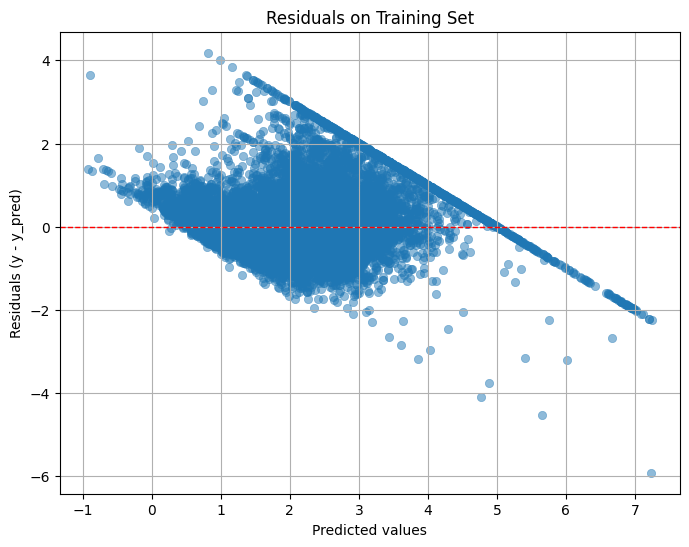

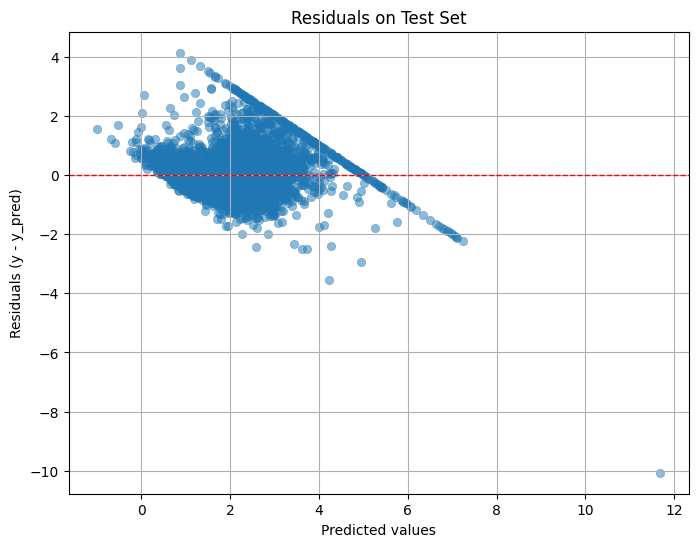

In [ ]:
plot_residuals(ytr, ytr_pred, title="Residuals on Training Set")
plot_residuals(yte, yte_pred, title="Residuals on Test Set")

Looking at the residual plots for both training and test sets, the pattern is pretty clear: the residuals aren’t randomly spread around zero — they curve outwards, especially as predicted values get higher.

In this case, the linear model seems to:
- underestimate when the predicted values are low (residuals are positive)
- overestimate when the predicted values are high (residuals go negative)

The effect gets more obvious closer to the 5.0 mark, which is also where the target was capped. That vertical drop at 5.0 in the residuals confirms what we saw earlier — the model is struggling with the artificial limit in the data.

Overall, even though the model generalizes OK (the RMSE and MAE gap is small), it’s clearly not capturing the full pattern in the data.

---

### Building a Repeatable Pipeline for Experimentation

To ensure reproducibility and to facilitate experimentation with different model configurations, I consolidated the preprocessing, training, and evaluation steps into a single pipeline function. This pipeline enables running a complete experiment with a single call, varying key parameters such as the training/test split size to observe how these influence performance metrics and residual behavior.

### Running the Pipeline with Different Training/Test Splits

I implemented a `pipeline` function that automates the entire modeling process:
1.  **Model Instantiation:** Initializes a `LinearRegression` model.
2.  **Data Splitting:** Divides the dataset into training and test sets based on the `train_size` parameter.
3.  **Model Training:** Trains the model on the training data.
4.  **Prediction Generation:** Generates predictions for both sets.
5.  **Model Evaluation:** Calculates and prints RMSE and MAE for training and test sets.
6.  **Residual Visualization (Optional):** Generates a residual plot for the test set, if requested.

I then ran this pipeline with various split ratios (40/60, 50/50, 60/40, 75/25, 90/10) to observe how training set size affects model performance and generalization ability.


In [ ]:
def pipeline(df, targets, train_size=0.75, show_residuals=True):
    model = LinearRegression()

    Xtr, Xte, ytr, yte = train_test_split(df, targets, train_size=train_size, random_state=42)

    model.fit(Xtr, ytr)

    ytr_pred = model.predict(Xtr)
    yte_pred = model.predict(Xte)

    rmse_train = np.sqrt(mean_squared_error(ytr, ytr_pred))
    mae_train = mean_absolute_error(ytr, ytr_pred)
    rmse_test = np.sqrt(mean_squared_error(yte, yte_pred))
    mae_test = mean_absolute_error(yte, yte_pred)

    print(f"Train size: {train_size:.2f} | Test size: {1-train_size:.2f}")
    print(f"Training RMSE: {rmse_train:.4f}")
    print(f"Training MAE:  {mae_train:.4f}")
    print(f"Test RMSE:     {rmse_test:.4f}")
    print(f"Test MAE:      {mae_test:.4f}")

    if show_residuals:
        residuals = yte - yte_pred
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=yte_pred, y=residuals, alpha=0.5, edgecolor=None)
        plt.axhline(0, color='red', linestyle='--', linewidth=1)
        plt.xlabel("Predicted values")
        plt.ylabel("Residuals (y - y_pred)")
        plt.title(f"Residuals on Test Set (train_size={train_size:.2f})")
        plt.grid(True)
        plt.show()

Train size: 0.40 | Test size: 0.60
Training RMSE: 0.7202
Training MAE:  0.5278
Test RMSE:     0.7284
Test MAE:      0.5323


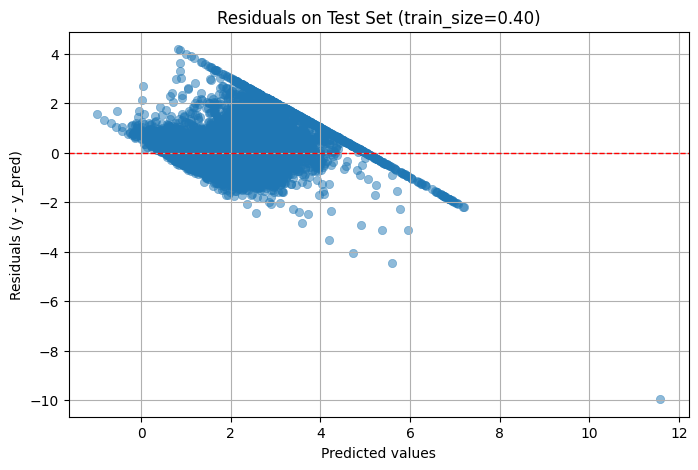

Train size: 0.50 | Test size: 0.50
Training RMSE: 0.7214
Training MAE:  0.5282
Test RMSE:     0.7286
Test MAE:      0.5320


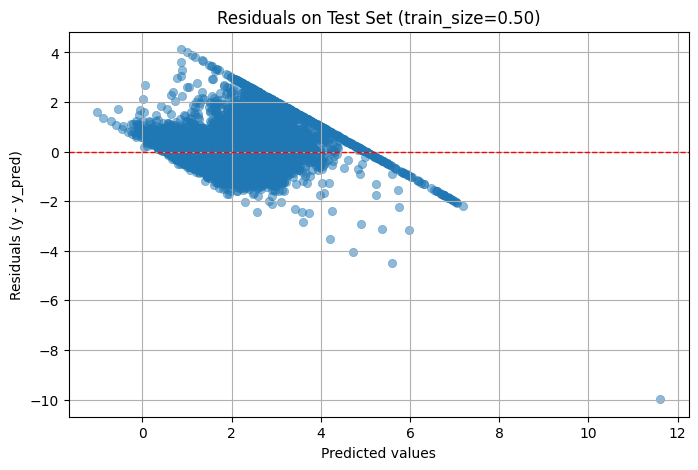

Train size: 0.60 | Test size: 0.40
Training RMSE: 0.7174
Training MAE:  0.5260
Test RMSE:     0.7373
Test MAE:      0.5337


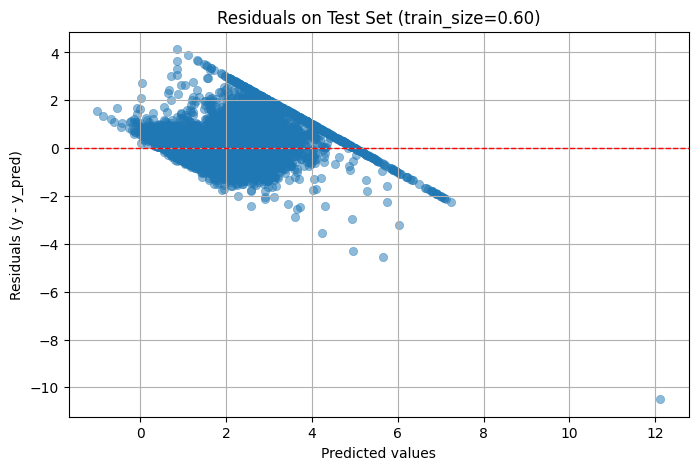

Train size: 0.75 | Test size: 0.25
Training RMSE: 0.7215
Training MAE:  0.5295
Test RMSE:     0.7356
Test MAE:      0.5297


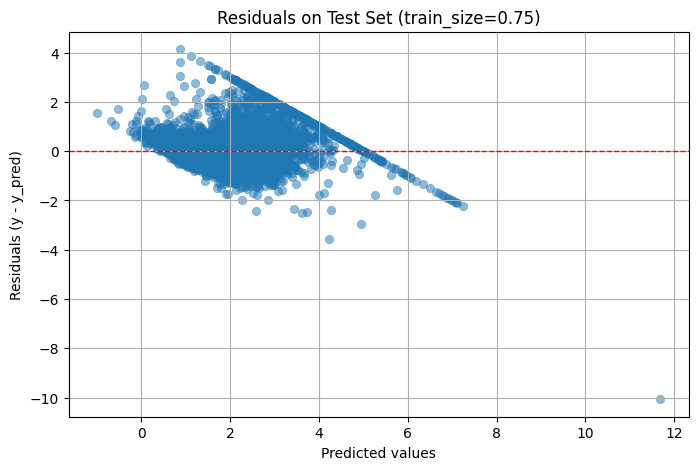

Train size: 0.90 | Test size: 0.10
Training RMSE: 0.7215
Training MAE:  0.5295
Test RMSE:     0.7477
Test MAE:      0.5424


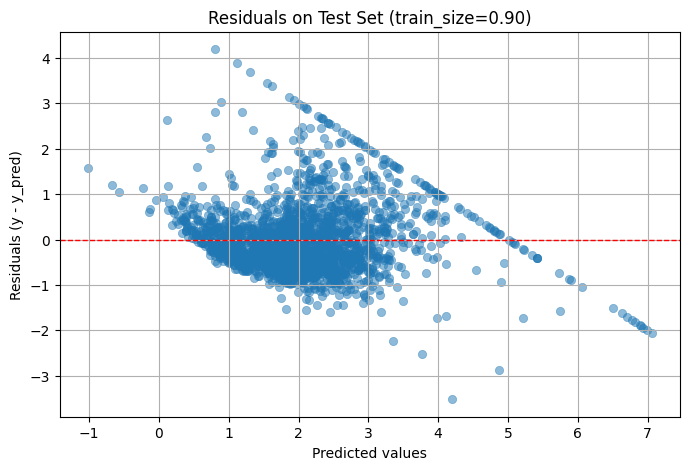

In [ ]:
t_split = [0.4, 0.5, 0.6, 0.75, 0.9]
for i in t_split:
    pipeline(df, targets, train_size=i)

I tested the model using five different train/test splits: 40/60, 50/50, 60/40, 75/25, and 90/10.  
The results were fairly consistent, but some differences are worth noting.

- As expected, the **training error remains low across all splits**, since the model always learns directly from that data.
- When I increased the training size from 40% to 60% and from 75% to 90%, the **test error did not improve significantly** — in fact, RMSE and MAE slightly increased at the 90/10 split, likely because the test set became too small and less representative.

The residual plots also confirmed that **the general pattern does not change significantly**: the model tends to overpredict low values and underpredict high ones, especially around the 5.0 cap.


---
## Part 2: Improving the Linear Regression Model

Having established a baseline with the simple linear regression model, this second part of the project focuses on exploring techniques to improve the model's performance. We will address two fundamental questions:

1.  **Feature Scaling:** Are the independent variables on similar scales? This is an important consideration, especially when introducing transformations such as polynomial features.
2.  **Model Variance:** Does the model exhibit high variance? That is, do its performance metrics vary significantly when trained on different data samples?

We will address these points by introducing polynomial features to increase model capacity and by using cross-validation techniques for more robust evaluation.

### Increasing Model Capacity with Polynomial Features

To explore the model's ability to capture non-linear relationships in the data, I introduced polynomial features using `sklearn.preprocessing.PolynomialFeatures`. This transformation creates new features representing powers and products of the original variables.

I extended the evaluation pipeline to test the model with different polynomial degrees (from 1 to 3). The objective was to observe how increasing model complexity impacts accuracy (RMSE and MAE) and to diagnose overfitting by analyzing performance on both the training and test sets, as well as the residual plots.

Before applying polynomial transformations, it is important to verify whether the independent variables are on similar scales. Uneven scaling can amplify certain features disproportionately when interactions and powers are introduced, potentially destabilizing the model.

#### Are our independent variables scaled similarly?

No, they are not. As observed in the `.describe()` output, variables like `Population` and `AveRooms` have significantly higher values compared to `HouseAge` or `MedInc`. This scale difference is especially important when using polynomial features with interaction terms, as it can cause certain variables to dominate the model, potentially compromising its performance or stability.

---

#### Does our model have high variance?  

That is, do the results vary dramatically if it is fitted to a new training sample?

Not significantly. After testing different train/test splits (40/60, 50/50, 60/40, 75/25, 90/10), the model provided fairly consistent results in terms of RMSE and MAE. This indicates that the linear model's variance is low: it generalizes well and does not fluctuate excessively depending on the training data sample.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold


=== Polynomial Degree: 1 ===
Train size: 0.75 | Test size: 0.25
Training RMSE: 0.7215
Training MAE:  0.5295
Test RMSE:     0.7356
Test MAE:      0.5297


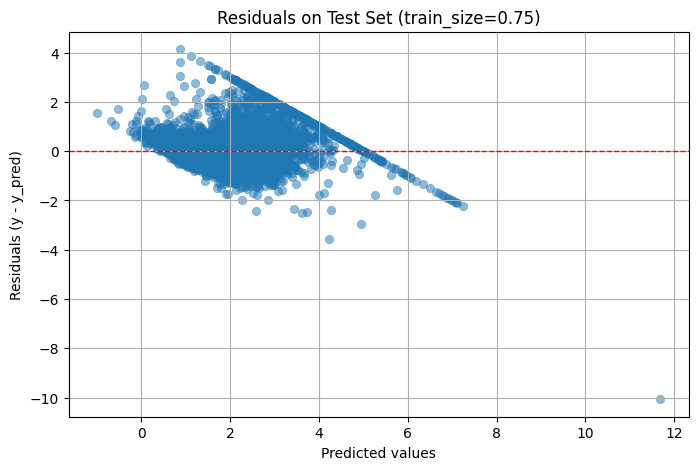


=== Polynomial Degree: 2 ===
Train size: 0.75 | Test size: 0.25
Training RMSE: 0.6505
Training MAE:  0.4620
Test RMSE:     0.6744
Test MAE:      0.4646


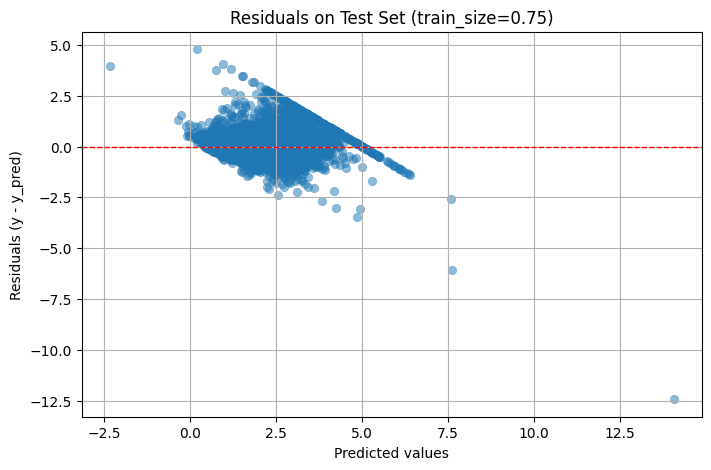


=== Polynomial Degree: 3 ===
Train size: 0.75 | Test size: 0.25
Training RMSE: 0.5981
Training MAE:  0.4270
Test RMSE:     2.2556
Test MAE:      0.4747


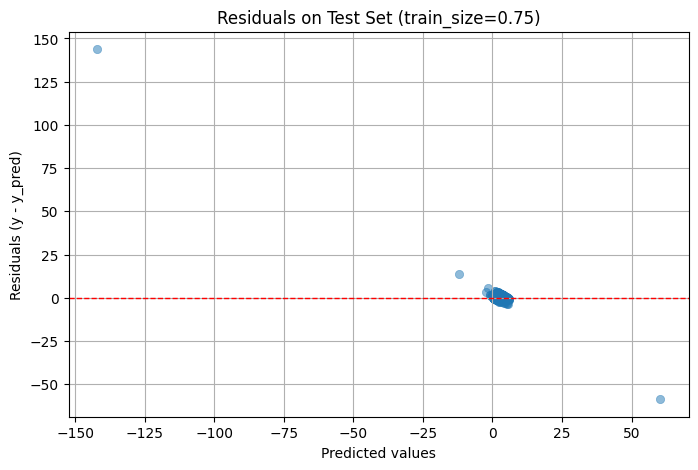

In [ ]:
def make_polynomial_df(df, degree, include_bias=False):
    poly = PolynomialFeatures(degree=degree, include_bias=include_bias)
    poly_np = poly.fit_transform(df)
    feature_names = poly.get_feature_names_out(df.columns)
    df_poly = pd.DataFrame(poly_np, columns=feature_names)
    return df_poly

for degree in [1, 2, 3]:
    print(f"\n=== Polynomial Degree: {degree} ===")
    df_poly = make_polynomial_df(df, degree=degree)
    pipeline(df_poly, targets, train_size=0.75)

When setting `PolynomialFeatures` with degree = 2, the model improved: RMSE decreased from 0.73 to 0.67, suggesting that degree = 2 helped capture some of the data's nonlinearity.

However, when setting `PolynomialFeatures` with degree = 3, RMSE increased from 0.67 to 2.25, which is a clear indication of overfitting, as confirmed by the residual plot. This suggests that the model is no longer robust.

---

### Optimal Polynomial Degree Selection via Cross-Validation

To determine the optimal degree for the polynomial feature transformation, I implemented a K-fold cross-validation strategy (K=5). This approach provides a more robust estimate of the model's performance. This technique divides the dataset into K subsets, training the model K times while using a different subset for validation in each iteration. It reduces dependence on a single training/test split and provides a more reliable estimate of the model's generalization capability.

I calculated the average RMSE across all cross-validation folds for each polynomial degree (from 1 to 5). I then compared these results with the RMSE values obtained on the individual training and test sets. This comparison is essential for identifying the bias-variance trade-off and selecting the degree that minimizes generalization error.


Degree 1 | Train RMSE: 0.7215 | Test RMSE: 0.7356 | CV RMSE: 0.7283
Degree 2 | Train RMSE: 0.6505 | Test RMSE: 0.6744 | CV RMSE: 5.0256
Degree 3 | Train RMSE: 0.5981 | Test RMSE: 2.2556 | CV RMSE: 31.3924
Degree 4 | Train RMSE: 0.6263 | Test RMSE: 12.2677 | CV RMSE: 1147.4760
Degree 5 | Train RMSE: 0.8989 | Test RMSE: 1.9435 | CV RMSE: 174.7370


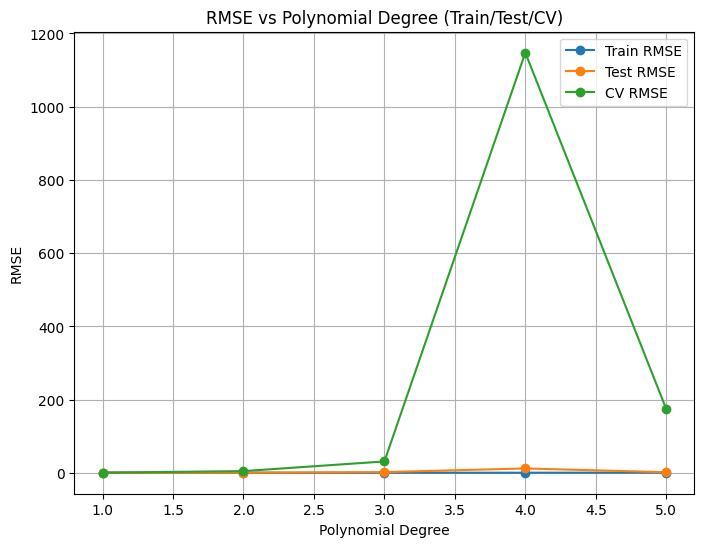

In [ ]:
degrees = [1, 2, 3, 4, 5]
train_rmse = []
test_rmse = []
cv_rmse = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)


    Xtr, Xte, ytr, yte = train_test_split(df, targets, train_size=0.75, random_state=42)
    Xtr_poly = poly.fit_transform(Xtr)
    Xte_poly = poly.transform(Xte)

    model = LinearRegression()
    model.fit(Xtr_poly, ytr)

    ytr_pred = model.predict(Xtr_poly)
    yte_pred = model.predict(Xte_poly)

    rmse_train = np.sqrt(mean_squared_error(ytr, ytr_pred))
    rmse_test = np.sqrt(mean_squared_error(yte, yte_pred))
    train_rmse.append(rmse_train)
    test_rmse.append(rmse_test)


    rmse_folds = []

    for train_index, val_index in kf.split(df):
        X_train, X_val = df.iloc[train_index], df.iloc[val_index]
        y_train, y_val = targets.iloc[train_index], targets.iloc[val_index]

        X_train_poly = poly.fit_transform(X_train)
        X_val_poly = poly.transform(X_val)

        model_cv = LinearRegression()
        model_cv.fit(X_train_poly, y_train)
        y_val_pred = model_cv.predict(X_val_poly)

        rmse_fold = np.sqrt(mean_squared_error(y_val, y_val_pred))
        rmse_folds.append(rmse_fold)

    rmse_cv = np.mean(rmse_folds)
    cv_rmse.append(rmse_cv)

    print(f"Degree {d} | Train RMSE: {rmse_train:.4f} | Test RMSE: {rmse_test:.4f} | CV RMSE: {rmse_cv:.4f}")


plt.figure(figsize=(8, 6))
plt.plot(degrees, train_rmse, marker='o', label='Train RMSE')
plt.plot(degrees, test_rmse, marker='o', label='Test RMSE')
plt.plot(degrees, cv_rmse, marker='o', label='CV RMSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("RMSE vs Polynomial Degree (Train/Test/CV)")
plt.legend()
plt.grid(True)
plt.show()

#### How should the optimal degree for the polynomial basis be selected?

To determine the optimal degree, I used 5-fold cross-validation. This method provides a more reliable estimate of model performance than a single train/test split, as it evaluates the model on different subsets of the data.

Examining the results, degree 1 achieved the lowest average RMSE in cross-validation. From degree 2 onward, the cross-validation error increased substantially, even though the test error at degree 2 appeared slightly better. This indicates that the model with degree 2 might already be slightly overfitting.


#### Is performance on the training set equal to that on the test set? Why?

No, and this is expected.

The model is trained to minimize error on the training set, so it naturally performs better there. The test set includes new data and serves to measure how well the model generalizes.

For degrees 1 and 2, the difference between training and test RMSE was small, which is a positive sign. From degree 3 onward, however, the m
odel began fitting the training data excessively and performed worse on the test set—demonstrating classic overfitting.


---
### Regularization with Ridge Regression

While polynomial features can improve model flexibility, they also risk overfitting by creating large, unstable coefficients. Ridge regression introduces L2 regularization, penalizing large weights and helping to control model complexity. This improves generalization and stability.

Below, Ridge Regression is applied with standardized features to evaluate its RMSE and interpret its learned coefficients.


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge_model.fit(Xtr, ytr)

y_pred_ridge = ridge_model.predict(Xte)

mse = mean_squared_error(yte, y_pred_ridge)
print("Ridge RMSE:", np.sqrt(mse))


Ridge RMSE: 0.735593233776387


In [ ]:
coefs = ridge_model.named_steps['ridge'].coef_
features = df.columns
for f, c in zip(features, coefs):
    print(f"{f}: {c:.3f}")

MedInc: 0.852
HouseAge: 0.121
AveRooms: -0.302
AveBedrms: 0.348
Population: -0.002
AveOccup: -0.041
Latitude: -0.892
Longitude: -0.867


      Feature  Coefficient
6    Latitude    -0.892347
7   Longitude    -0.867029
0      MedInc     0.852043
3   AveBedrms     0.348323
2    AveRooms    -0.301876
1    HouseAge     0.120738
5    AveOccup    -0.041168
4  Population    -0.001617


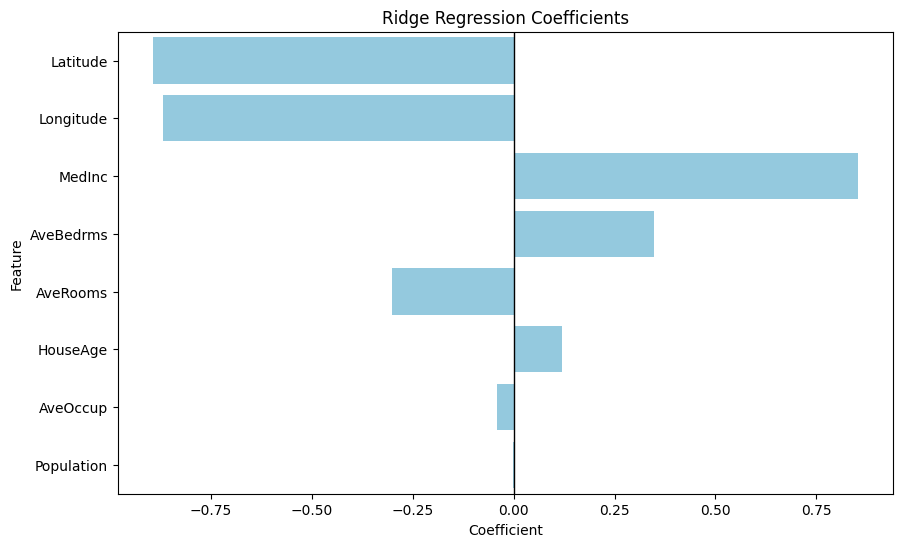

In [ ]:
coef_df = pd.DataFrame({
    'Feature': df.columns,
    'Coefficient': coefs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, color='skyblue')
plt.title('Ridge Regression Coefficients')
plt.axvline(0, color='black', linewidth=1)
plt.show()

### Conclusion and Further Directions

Ridge regression demonstrates how regularization helps mitigate overfitting, producing more stable and interpretable models even when features vary in scale. The coefficient analysis highlights which variables most influence housing prices.

Future work could include exploring other regularization methods such as Lasso (for feature selection) or ElasticNet (a mix of L1 and L2 penalties). We could also experiment with non-linear models such as decision trees, random forests, or gradient boosting to capture complex relationships more flexibly.
